In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
# set path to prediction data
DATA_PATH = '/p/haicluster/niesel1/star-formation-ML/logs/eval/runs/2023-07-18_12-01-31'

In [7]:
# load data
x_test = np.load(os.path.join(DATA_PATH, 'x_test.npy'))
y_test = np.load(os.path.join(DATA_PATH, 'y_test.npy'))
y_test_rescaled = np.load(os.path.join(DATA_PATH, 'y_test_rescaled.npy'))
y_pred = np.load(os.path.join(DATA_PATH, 'y_pred.npy'))
y_pred_rescaled = np.load(os.path.join(DATA_PATH, 'y_pred_rescaled.npy'))

In [5]:
spectrum_length = int(x_test.shape[1] / 3)

In [6]:
# identify the three worst samples
errors = np.mean(np.abs(y_pred - y_test), axis=1)
worst_samples = np.argsort(errors)[-3:]
best_samples = np.argsort(errors)[:3]

In [7]:
y_test_rescaled.min(axis=0)

array([50.000004 , -3.       , -3.0000002, -3.       , -1.       ],
      dtype=float32)

In [8]:
y_test_rescaled.max(axis=0)

array([ 4.0000003e+02, -1.0000000e-01,  2.6989701e+00, -1.0000000e-01,
        1.0000000e+00], dtype=float32)

In [9]:
def plot_spectra(indices):
    fig, axs = plt.subplots(3, 4, figsize=(10, 10))
    for i in range(3):
        mae = np.mean(np.abs(y_pred[indices[i]] - y_test[indices[i]]))
        axs[i, 0].set_ylabel(f"MAE: {'{:.2f}'.format(mae)}")
        axs[i, 0].plot(x_test[indices[i], :spectrum_length])
        axs[i, 1].plot(x_test[indices[i], spectrum_length:2*spectrum_length])
        axs[i, 2].plot(x_test[indices[i], 2*spectrum_length:])
        axs[i, 3].scatter(range(5), y_test[indices[i]])
        axs[i, 3].scatter(range(5), y_pred[indices[i]])
        axs[i, 3].set_xticks(range(5))
        # connect vertically aligned points by dotted lines
        for j in range(4):
            axs[i, 3].plot([j, j], [y_test[indices[i], j], y_pred[indices[i], j]], 'k--')
        axs[i, 3].legend(['True', 'Predicted'])
        # fix y axis limits
        axs[i, 3].set_ylim([-0.25, 1.25])
    axs[0, 0].set_title('Spectrum 1')
    axs[0, 1].set_title('Spectrum 2')
    axs[0, 2].set_title('Spectrum 3')
    axs[0, 3].set_title('Parameters')
    plt.show()

### Overview about error made

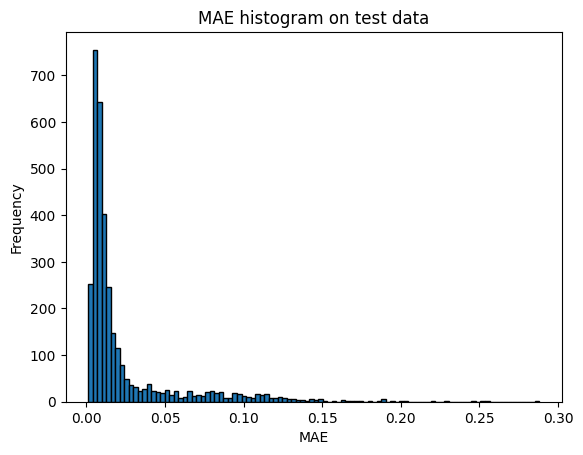

In [10]:
# todo: change to hist plot
plt.hist(errors, bins=100, edgecolor='black')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.title('MAE histogram on test data')
plt.show()

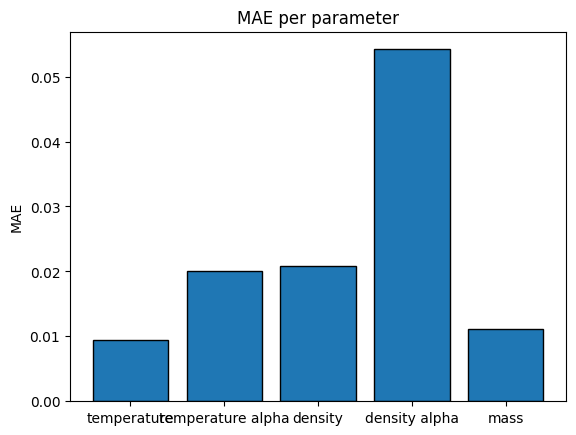

In [11]:
# plot the mae per parameter (todo: labels for parameters)
mae_per_param = np.mean(np.abs(y_pred - y_test), axis=0)
plt.bar(range(5), mae_per_param, edgecolor='black')
plt.xticks(range(5), ['temperature', 'temperature alpha', 'density', 'density alpha', 'mass'])
plt.ylabel('MAE')
plt.title('MAE per parameter')
plt.show()

### 3 random samples

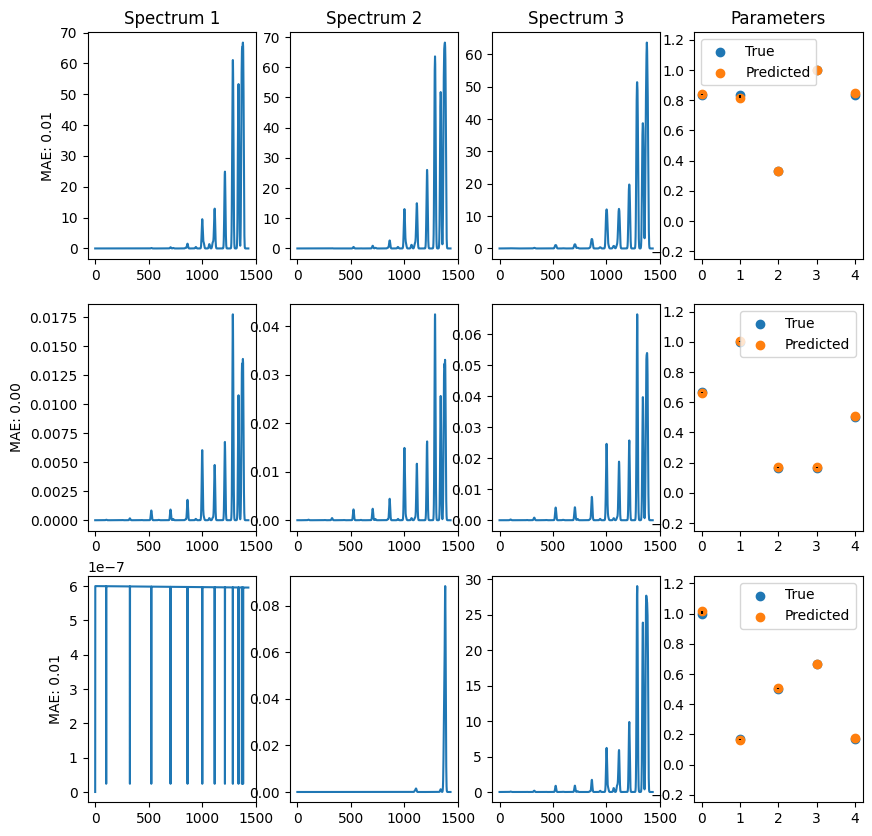

In [13]:
# plot 3 random samples
np.random.seed(42)
indices = np.random.randint(0, x_test.shape[0], 3)
plot_spectra(indices)

### 3 best samples

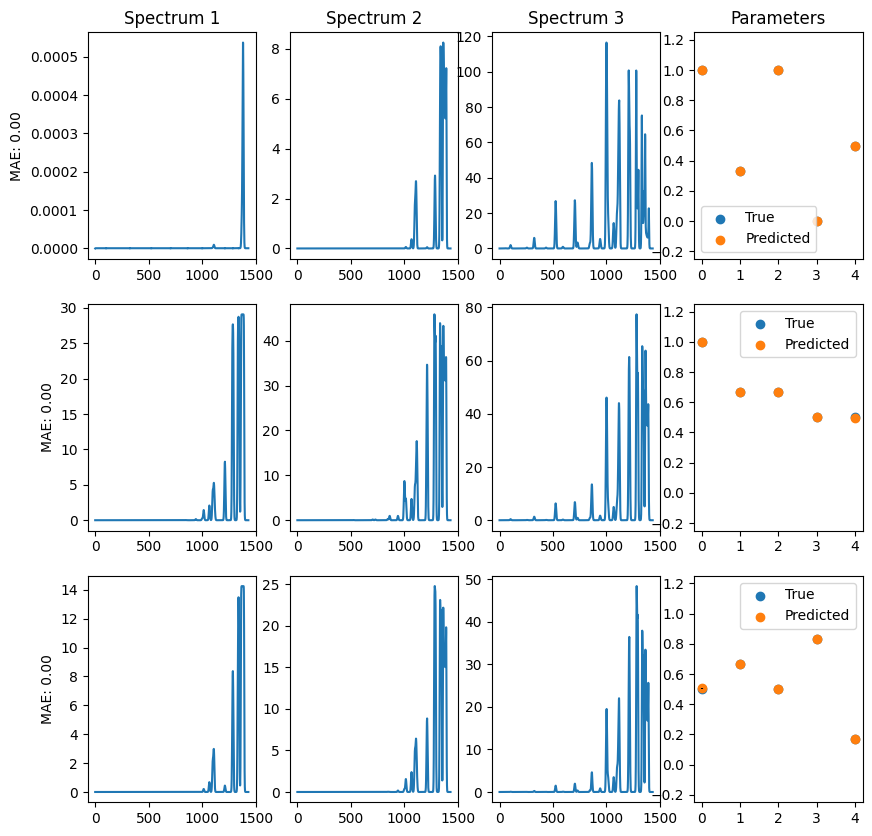

In [14]:
# plot the three best samples
plot_spectra(best_samples)

### 3 worst samples

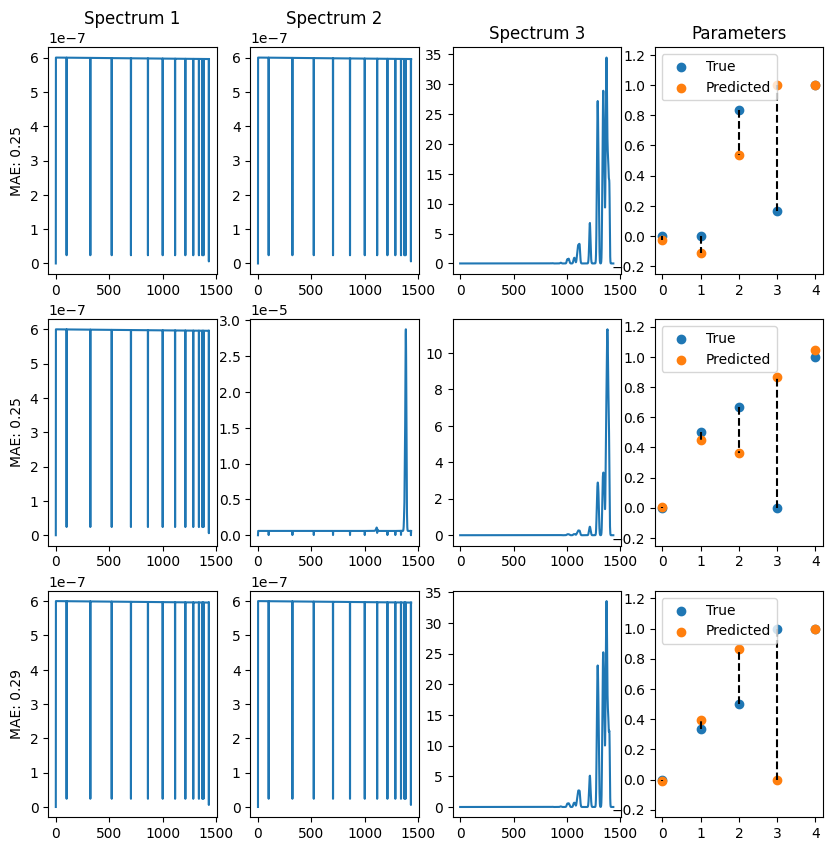

In [15]:
# plot the three worst samples
plot_spectra(worst_samples)